Just some quick tests to ensure that EIS, XRT, and AIA are actually aligned.

The XRT pointing, comparing with AIA, actually looks really good. The EIS pointing is still *slightly* off but looks mostly ok. This should be revisited at some point before publication.

In [36]:
import astropy.units as u
import sunpy.map
from sunpy.net import Fido,attrs as a
import numpy as np
import matplotlib.pyplot as plt
import eispac.core
from sunpy.coordinates import propagate_with_solar_surface

In [70]:
#m_xrt = sunpy.map.Map('../data/noaa_11967/XRT/level_1/L1_XRT20140203_110221.2.fits')
#m_eis = sunpy.map.Map('../data/noaa_11967/EIS/level_2.5/eis_20140203_093134.ca_16_208_604.2c-0.int.fits')
m_xrt = sunpy.map.Map('../data/noaa_11990/XRT/level_1/L1_XRT20140302_000009.0.fits')
m_eis = sunpy.map.Map('../data/noaa_11990/EIS/level_2.5/eis_20140302_000659.fe_16_262_984.1c-0.int.fits')
m_eis.mask = m_eis.data <= 0.0

In [58]:
q = Fido.search(
    a.Time(m_xrt.date-30*u.s, end=m_xrt.date+30*u.s, near=m_xrt.date),
    a.Instrument.aia,
    a.Wavelength(94*u.AA),
)
file = Fido.fetch(q)
m_aia = sunpy.map.Map(file)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1.94A_2014_03_02T00_00_13.12Z.image_lev1.fits:   0%|          | 0.00/7.22M [00:00<?, ?B/s]

(1519.7134280937073, 2175.499616233387)

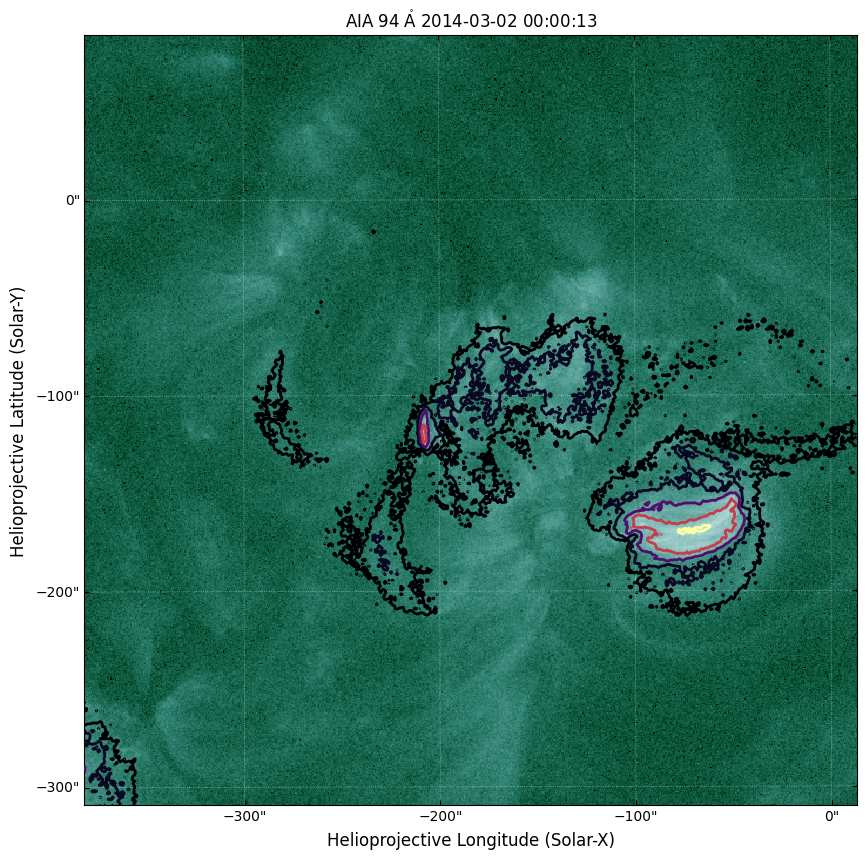

In [62]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection=m_aia)
m_aia.plot(axes=ax,clip_interval=(1,99.99)*u.percent)
m_xrt.draw_contours([5,10,25,50,90]*u.percent,axes=ax,cmap='inferno',alpha=1)
xmin,ymin = m_aia.wcs.world_to_pixel(m_xrt.bottom_left_coord)
xmax,ymax = m_aia.wcs.world_to_pixel(m_xrt.top_right_coord)
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)

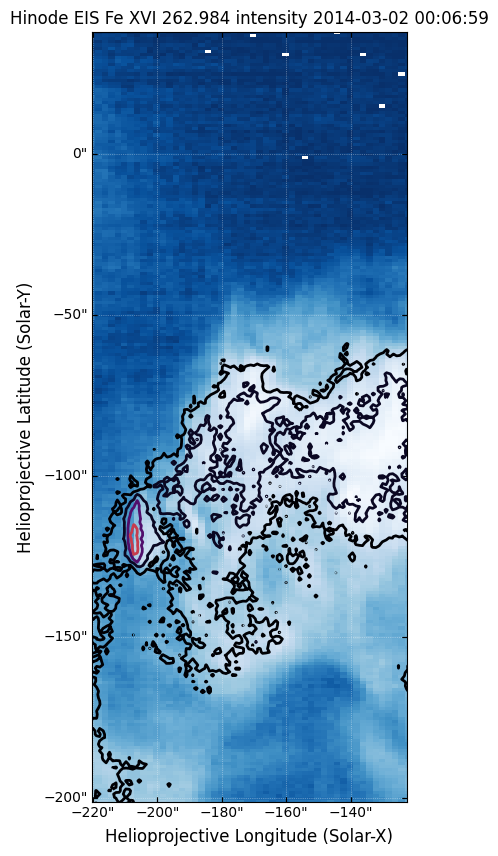

In [73]:
with propagate_with_solar_surface():
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection=m_eis)
    m_eis.plot(axes=ax,clip_interval=(1,99.9)*u.percent)
    m_xrt.draw_contours([5,10,25,50,90]*u.percent,axes=ax,cmap='inferno',alpha=1)
    #m_aia.draw_contours([1,5,10,25,50,90]*u.percent,axes=ax,cmap='inferno',alpha=1)
    xmin,ymin = 0,0#m_eis.wcs.world_to_pixel(m_xrt.bottom_left_coord)
    xmax,ymax = np.array(m_eis.data.shape)[::-1] - 1#m_eis.wcs.world_to_pixel(m_xrt.top_right_coord)
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)